#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# About Features

1. **Employee ID**: A unique identifier for each employee. Usually a numeric or alphanumeric code.

2. **Name**: The full name of the employee. This might be split into first and last names in some datasets.

3. **Department**: The department or division within the organization where the employee works.

4. **Job Title**: The official title or position held by the employee in the organization.

5. **Salary**: The amount of money the employee earns. This could be represented as an annual salary, hourly wage, or monthly pay.

6. **Hire Date**: The date when the employee started working at the organization. Useful for calculating tenure or experience.

7. **Gender**: The gender of the employee. This might be included in some datasets for diversity and equality analysis.

8. **Years of Experience**: The total number of years the employee has worked in their field or profession.

9. **Education Level**: The highest level of education attained by the employee, such as a high school diploma, bachelor's degree, etc.

10. **Performance Rating**: If available, this could be a measure of the employee's performance in their role, often based on annual review scores.

11. **Location**: The geographical location or office where the employee works, if the organization has multiple locations.



# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load your dataset
df = pd.read_csv('SalariesX.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco


In [2]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency'],
      dtype='object')

### 1. Basic Data Exploration

In [3]:
# the number of rows and columns in the dataset
df.shape
print("No of Rows:",df.shape[0])
print("No of Columns:",df.shape[1])

No of Rows: 148654
No of Columns: 12


In [4]:
# data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
dtypes: float64(7), int64(2), object(3)
memory usage: 13.6+ MB


In [5]:
# Finding number of missing values in each column

missing_values = df.isna().sum().reset_index()
missing_values.columns = ['columns','missing_counts']
missing_values

,columns,missing_counts
0,Id,0
1,EmployeeName,0
2,JobTitle,0
3,BasePay,609
4,OvertimePay,4
5,OtherPay,4
6,Benefits,36163
7,TotalPay,0
8,TotalPayBenefits,0
9,Year,0


### 2. Descriptive Statistics

In [6]:
#  basic statistics
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN


### 3. Data Cleaning

In [7]:
# Dropping "Id","Notes" & "Agency" columns

df.drop(["Id", "Notes", "Agency"], axis = 1, inplace = True)
df.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011


In [8]:
# Replacing the null values & "Not Provided" values in Basepay & Benefits,OvertimePay,OtherPay with 0

for column in ['BasePay', 'Benefits','OvertimePay','OtherPay']:
    df[column] = np.where((df[column].isna()) | (df[column] == "Not Provided"),0,df[column])

In [9]:
# How many total missing values do we have in our dataset and percent of the data that is missing

missing_values_count = df.isnull().sum(axis=0)
print(missing_values_count)

EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
dtype: int64


### 4. Basic Data Visualization

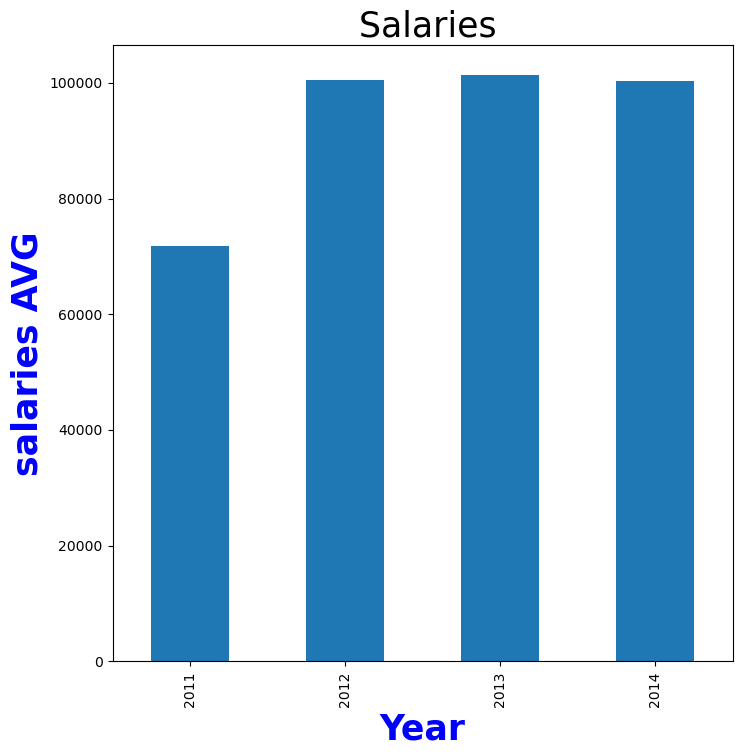

In [10]:
# bar chart to visualize the distribution of salaries.

plt.figure(figsize = [8 , 8])
df.groupby('Year')['TotalPayBenefits'].mean().plot.bar();
plt.xlabel('Year' ,fontsize = 25 , weight = 'bold' , color = 'b' )
plt.title(' Salaries',fontsize = 25 );
plt.ylabel('salaries AVG' ,fontsize = 25 , weight = 'bold' , color = 'b');

In [11]:
ya=df['JobTitle'].value_counts().head(5)
ya

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

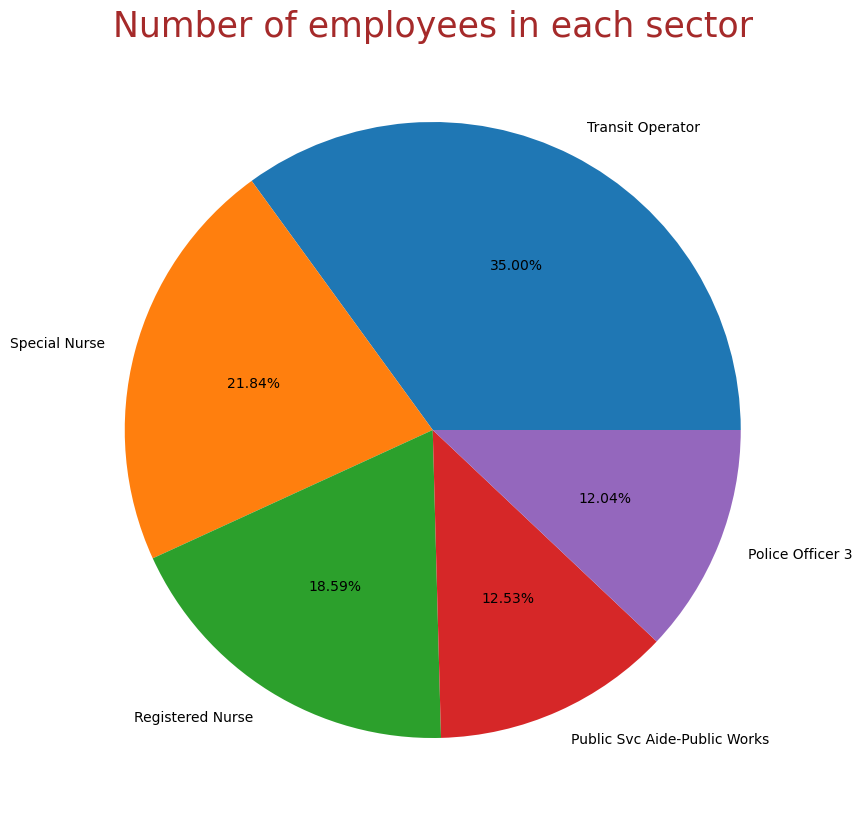

In [12]:
# pie charts to represent the proportion of employees in different departments.

plt.figure(figsize = [10 , 10])
plt.pie(ya , labels=['Transit Operator','Special Nurse','Registered Nurse','Public Svc Aide-Public Works', 'Police Officer 3'] ,autopct="%0.2f%%"  ); 
plt.rcParams['font.size'] = 18
plt.title('Number of employees in each sector',fontsize = 25 , c='brown');

### 5. Grouped Analysis

<Axes: xlabel='Year'>

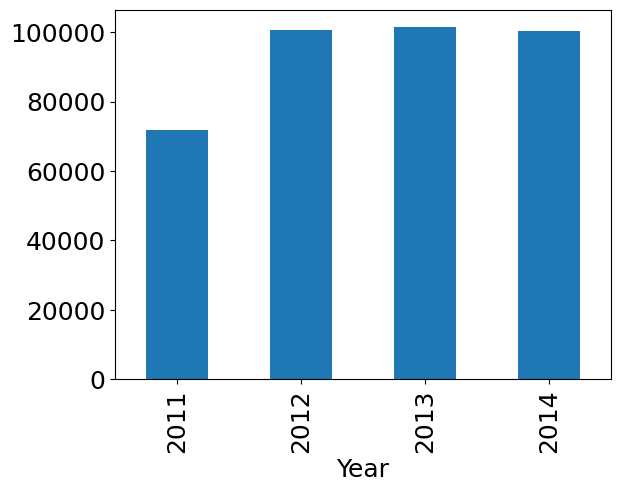

In [13]:
df.groupby("Year")["TotalPayBenefits"].mean().plot.bar()

In [14]:
df.groupby("JobTitle")["TotalPayBenefits"].mean()

JobTitle
ACCOUNT CLERK                                     44035.664337
ACCOUNTANT                                        47429.268000
ACCOUNTANT INTERN                                 29031.742917
ACPO,JuvP, Juv Prob (SFERS)                       80266.370000
ACUPUNCTURIST                                     67594.400000
                                                      ...     
X-RAY LABORATORY AIDE                             52705.880385
X-Ray Laboratory Aide                             69521.123200
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS    53632.870000
Youth Comm Advisor                                60118.550000
ZOO CURATOR                                       66686.560000
Name: TotalPayBenefits, Length: 2159, dtype: float64

In [15]:
df[df["JobTitle"] == "ACCOUNTANT"].describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,5.000000,5.0,5.000000,5.0,5.000000,5.000000,5.0
mean,46643.172000,0.0,786.096000,0.0,47429.268000,47429.268000,2011.0
std,27703.019579,0.0,1221.582691,0.0,27137.331315,27137.331315,0.0
min,0.000000,0.0,0.000000,0.0,1148.400000,1148.400000,2011.0
25%,42522.300000,0.0,0.000000,0.0,45304.380000,45304.380000,2011.0
50%,60076.240000,0.0,0.000000,0.0,60076.240000,60076.240000,2011.0
75%,65225.310000,0.0,1148.400000,0.0,65225.310000,65225.310000,2011.0
max,65392.010000,0.0,2782.080000,0.0,65392.010000,65392.010000,2011.0


In [16]:
df[df["JobTitle"] == "X-RAY LABORATORY AIDE"].describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,26.000000,26.000000,26.000000,26.0,26.000000,26.000000,26.0
mean,47664.773077,3571.223462,1469.883846,0.0,52705.880385,52705.880385,2011.0
std,17300.039056,4858.619801,1594.230668,0.0,19760.943417,19760.943417,0.0
min,4690.680000,0.000000,200.000000,0.0,5343.690000,5343.690000,2011.0
25%,49930.617500,429.320000,420.807500,0.0,51729.915000,51729.915000,2011.0
50%,54066.080000,2471.100000,833.150000,0.0,60333.125000,60333.125000,2011.0
75%,60053.590000,4339.037500,1857.645000,0.0,64305.285000,64305.285000,2011.0
max,60086.620000,23016.220000,5643.930000,0.0,85077.400000,85077.400000,2011.0


### 6. Simple Correlation Analysis

In [17]:
# Calculate correlation
correlation = df['BasePay'].corr(df['Benefits'])
print(f"Correlation between Salary and Benefits: {correlation}")

Correlation between Salary and Benefits: 0.6541533290382703


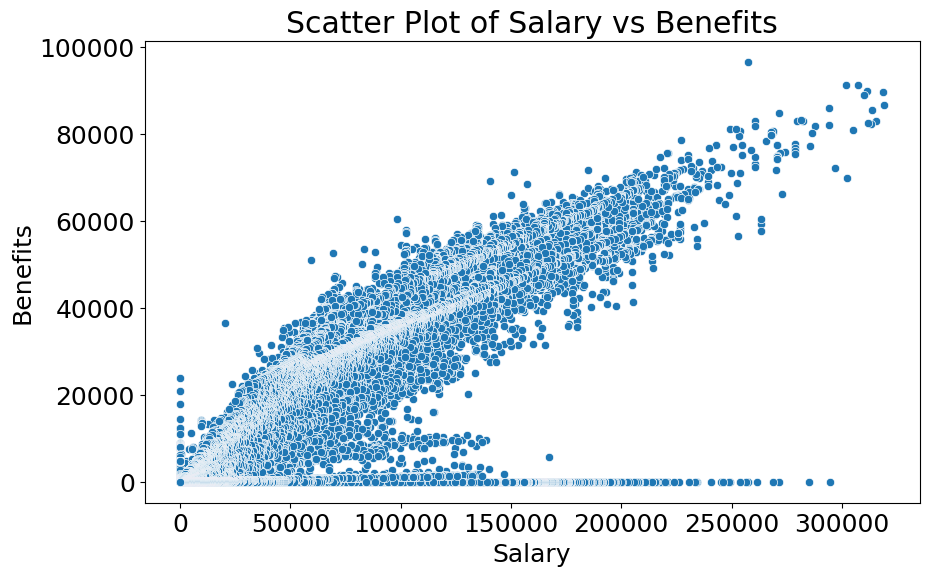

In [18]:
# Plot scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BasePay', y='Benefits', data=df)
plt.title('Scatter Plot of Salary vs Benefits')
plt.xlabel('Salary')
plt.ylabel('Benefits')
plt.show()

### 7. Summary of Insights

#### - This data covers four years of data: 2011-2014 and We see that the number of employees increases slightly every year.

- the distribution of salaries remains mostly consistent from year to year.

- the salary distribution is clearly multimodal, which begs further investigation. 
 It also appears that 2014 may have had a slight increase relative to previous years.

- THe most common job was transit operator, with nearly 10,000 employees